In [1]:
from util import *
import matplotlib.pyplot as plt
import seaborn as ses

In [11]:
mall_id = "m_7168"
train = load_train()
train = train[train.mall_id==mall_id]
test = load_testA()
test = test[test.mall_id == mall_id]
shop = load_shop_info()
shop = shop[shop.mall_id == mall_id]

In [10]:
print "train", "user shape", train.user_id.shape, "unique shape", train.user_id.unique().shape
print "test", "user shape", test.user_id.shape, "unique shape", test.user_id.unique().shape
print "train union test user unique shape", np.union1d(train.user_id.unique(),test.user_id.unique()).shape
print "train intersect test user unique shape", np.intersect1d(train.user_id.unique(),test.user_id.unique()).shape

train user shape (26355,) unique shape (15777,)
test user shape (11737,) unique shape (7721,)
train union test user unique shape (21895,)
train intersect test user unique shape (1603,)


In [25]:
user_count = train.groupby("user_id").count()["shop_id"].reset_index().sort_values(by="shop_id",ascending=False)
part_user_10 = user_count[user_count.shop_id > 10]

In [27]:
part_user_10[:10]

,user_id,shop_id
5006,u_26059542,55
6540,u_32130913,36
13508,u_57772653,34
6273,u_30769431,23
8278,u_38073414,21
13707,u_58732988,19
6566,u_32316126,19
9833,u_44071612,17
1241,u_13145620,17
10599,u_46189169,17


In [97]:
for i in range(10):
    u = train[train.user_id ==  part_user_10.user_id.values[i]]
    u_test = test[test.user_id == part_user_10.user_id.values[i]]
    u_matrix = train_matrix[np.in1d(u.index,train_index)] 
    print (u_matrix > -60).sum(0).max() / float(u_matrix.shape[0])
    print (u_matrix > -60).sum().max() * float(u.shop_id.unique().shape[0])
    print 

0.0545454545455
106.0

0.0555555555556
495.0

0.0588235294118
55.0

0.0869565217391
111.0

0.0952380952381
192.0

0.105263157895
174.0

0.105263157895
116.0

0.117647058824
288.0

0.117647058824
240.0

0.117647058824
192.0



/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 55
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 36
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 34
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26355 but corresponding boolean dimension is 23
  after removing the cwd from sys.path.
/usr/lib/pyt

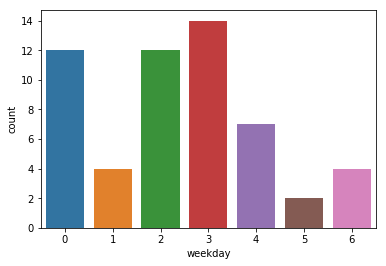

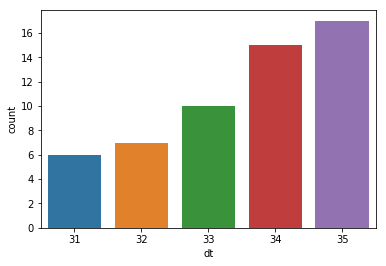

In [42]:
preprocess_basic_time(u)
ses.countplot(x="weekday",data=u)
plt.show()
ses.countplot(u.dt.dt.week)
plt.show()

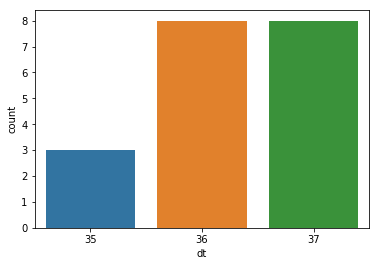

In [47]:
preprocess_basic_time(u_test)
ses.countplot(u_test.dt.dt.week)
plt.show()

In [57]:
for _u in part_user_10.user_id.values:
    print _u, train[train.user_id == _u].shop_id.unique()

u_26059542 ['s_460419']
u_32130913 ['s_295706' 's_293805' 's_2310712' 's_293785' 's_45040' 's_294960'
 's_293704' 's_293082' 's_293031']
u_57772653 ['s_460419']
u_30769431 ['s_294960' 's_460419' 's_293805']
u_38073414 ['s_2303129' 's_2310712' 's_295706' 's_293704' 's_15236' 's_293082']
u_58732988 ['s_295610' 's_293031' 's_294960' 's_45040' 's_293785' 's_2310712']
u_32316126 ['s_62317' 's_301215' 's_4386' 's_448230']
u_44071612 ['s_43369' 's_3749811' 's_3741710' 's_39875' 's_4386' 's_20731' 's_381787'
 's_63306' 's_3846218' 's_41948' 's_135671' 's_62317']
u_13145620 ['s_293704' 's_8426' 's_294228' 's_294960' 's_2310712' 's_293785'
 's_2303143' 's_295706' 's_293805' 's_97734']
u_46189169 ['s_2303129' 's_2783591' 's_293805' 's_2956027' 's_385716' 's_293704'
 's_293082' 's_293031']
u_28145494 ['s_295706' 's_301215' 's_2783591' 's_381583' 's_293805' 's_2303143'
 's_2310712' 's_2303129' 's_293785' 's_788134' 's_385716' 's_293704']
u_36521134 ['s_460419' 's_381583']
u_57038308 ['s_293805' 's_

In [59]:
print shop[shop.shop_id=="s_460419"]
print shop[shop.shop_id=="s_45040"]


       shop_id category_id  shop_longitude  shop_latitude  price mall_id
2905  s_460419        c_27      116.862611      40.326208     46  m_7168
     shop_id category_id  shop_longitude  shop_latitude  price mall_id
418  s_45040        c_29      116.863733      40.326627     50  m_7168


In [4]:
df,train_cache, test_cache = get_wifi_cache(mall_id)
train_index = train_cache[0]
train_use_wifi = train_cache[1]
train_matrix = train_cache[2]
test_index = test_cache[0]
test_use_wifi = test_cache[1]
test_matrix = test_cache[2]

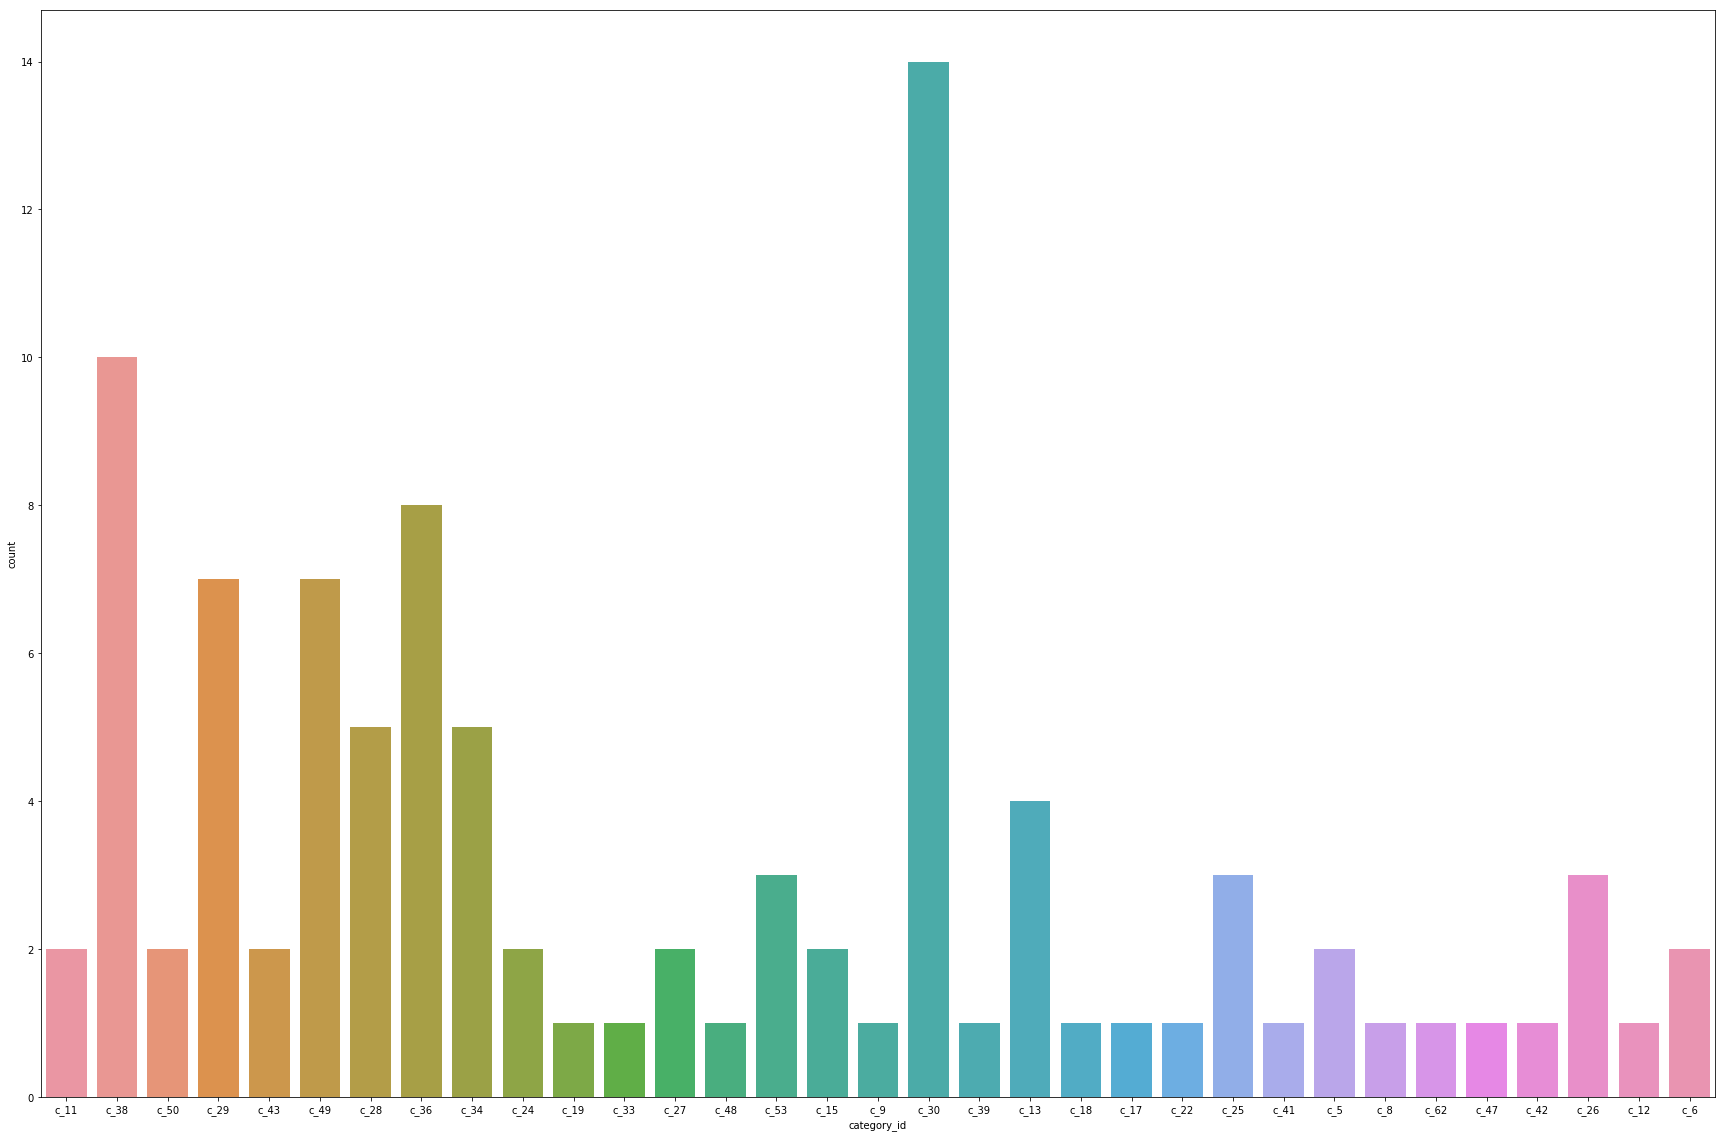

In [27]:
f,ax = plt.subplots(1,1,figsize=(30,20))
ses.countplot(x="category_id", data=shop,ax=ax)
plt.show()

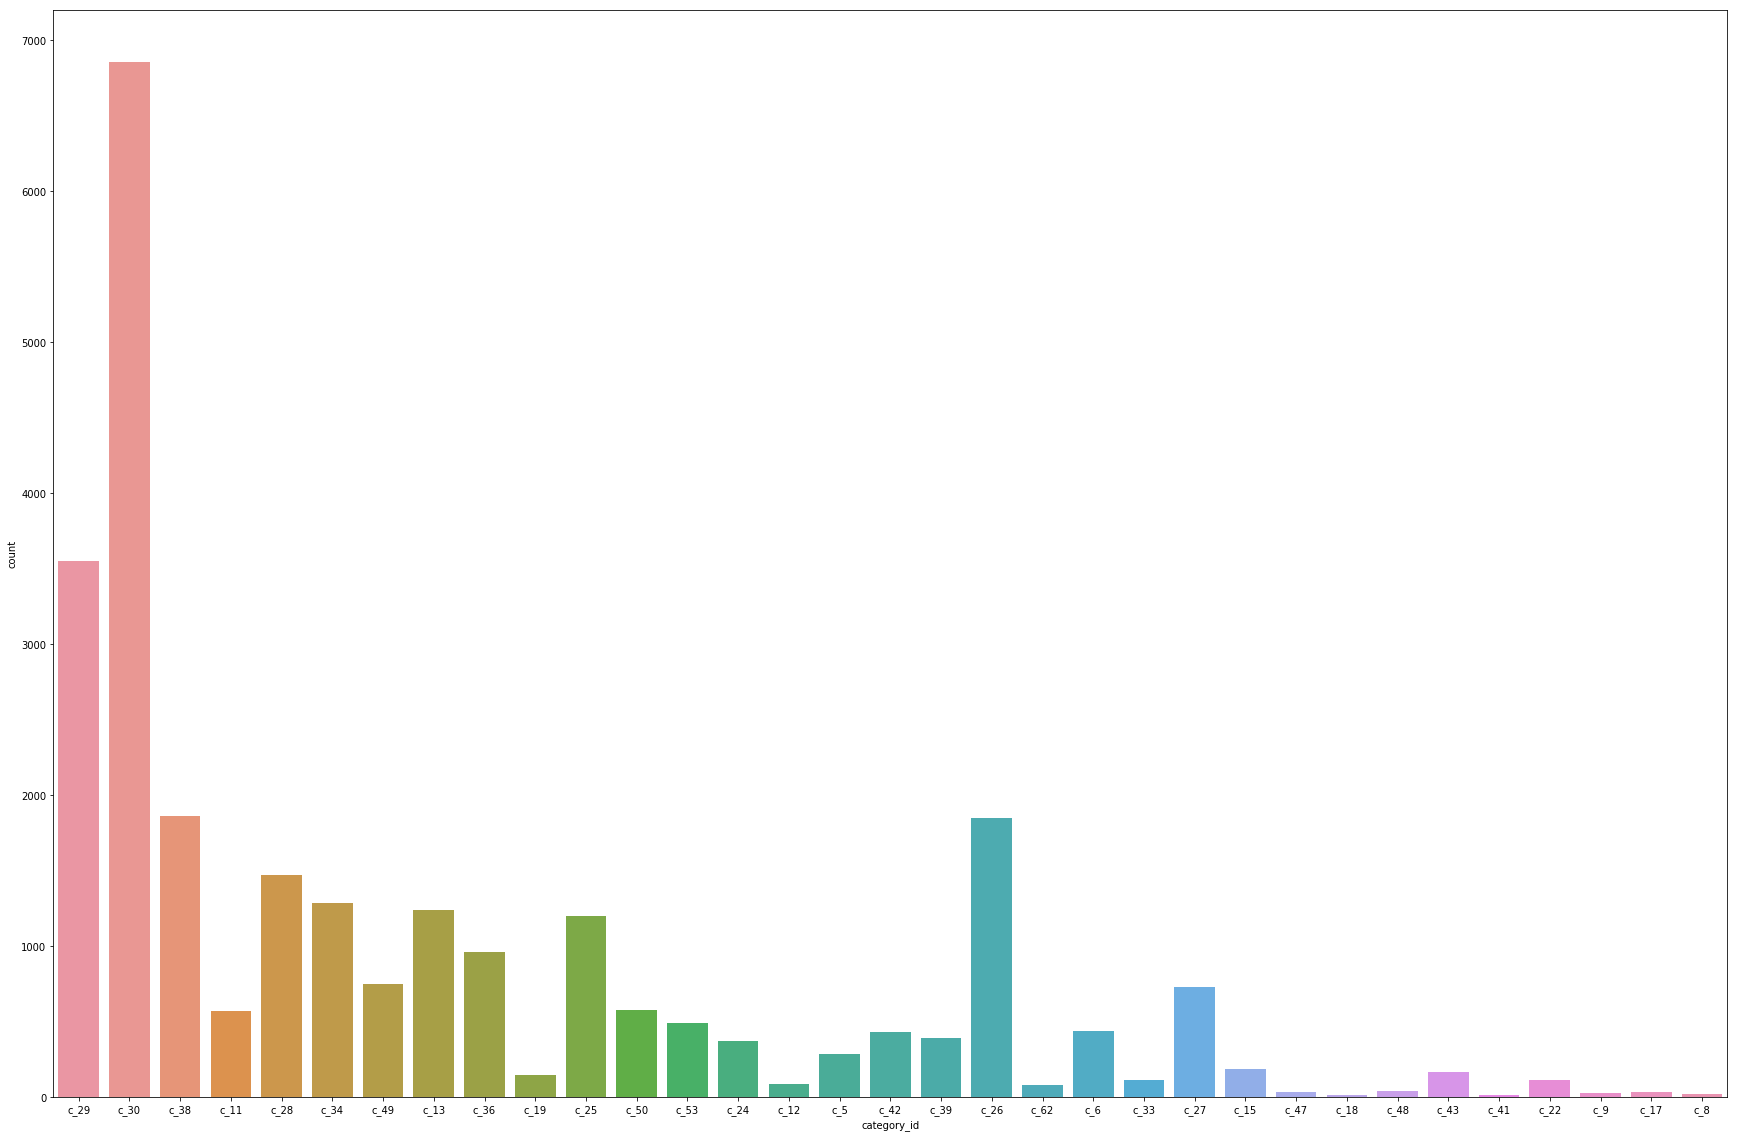

In [28]:
f,ax = plt.subplots(1,1,figsize=(30,20))
ses.countplot(x="category_id", data=train,ax=ax)
plt.show()

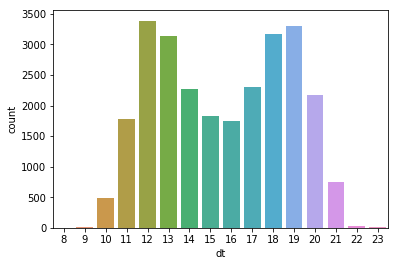

In [19]:
ses.countplot(train.dt.dt.hour)
plt.show()

In [57]:
little = train[(train.dt.dt.hour < 10) | (train.dt.dt.hour >21 )]
zhongwu = train[(train.dt.dt.hour >=10) & (train.dt.dt.hour <=13 )]
xiawu  = train[(train.dt.dt.hour >=14) & (train.dt.dt.hour <=17 )]
wanshang = train[(train.dt.dt.hour >=18) & (train.dt.dt.hour <=21 )]

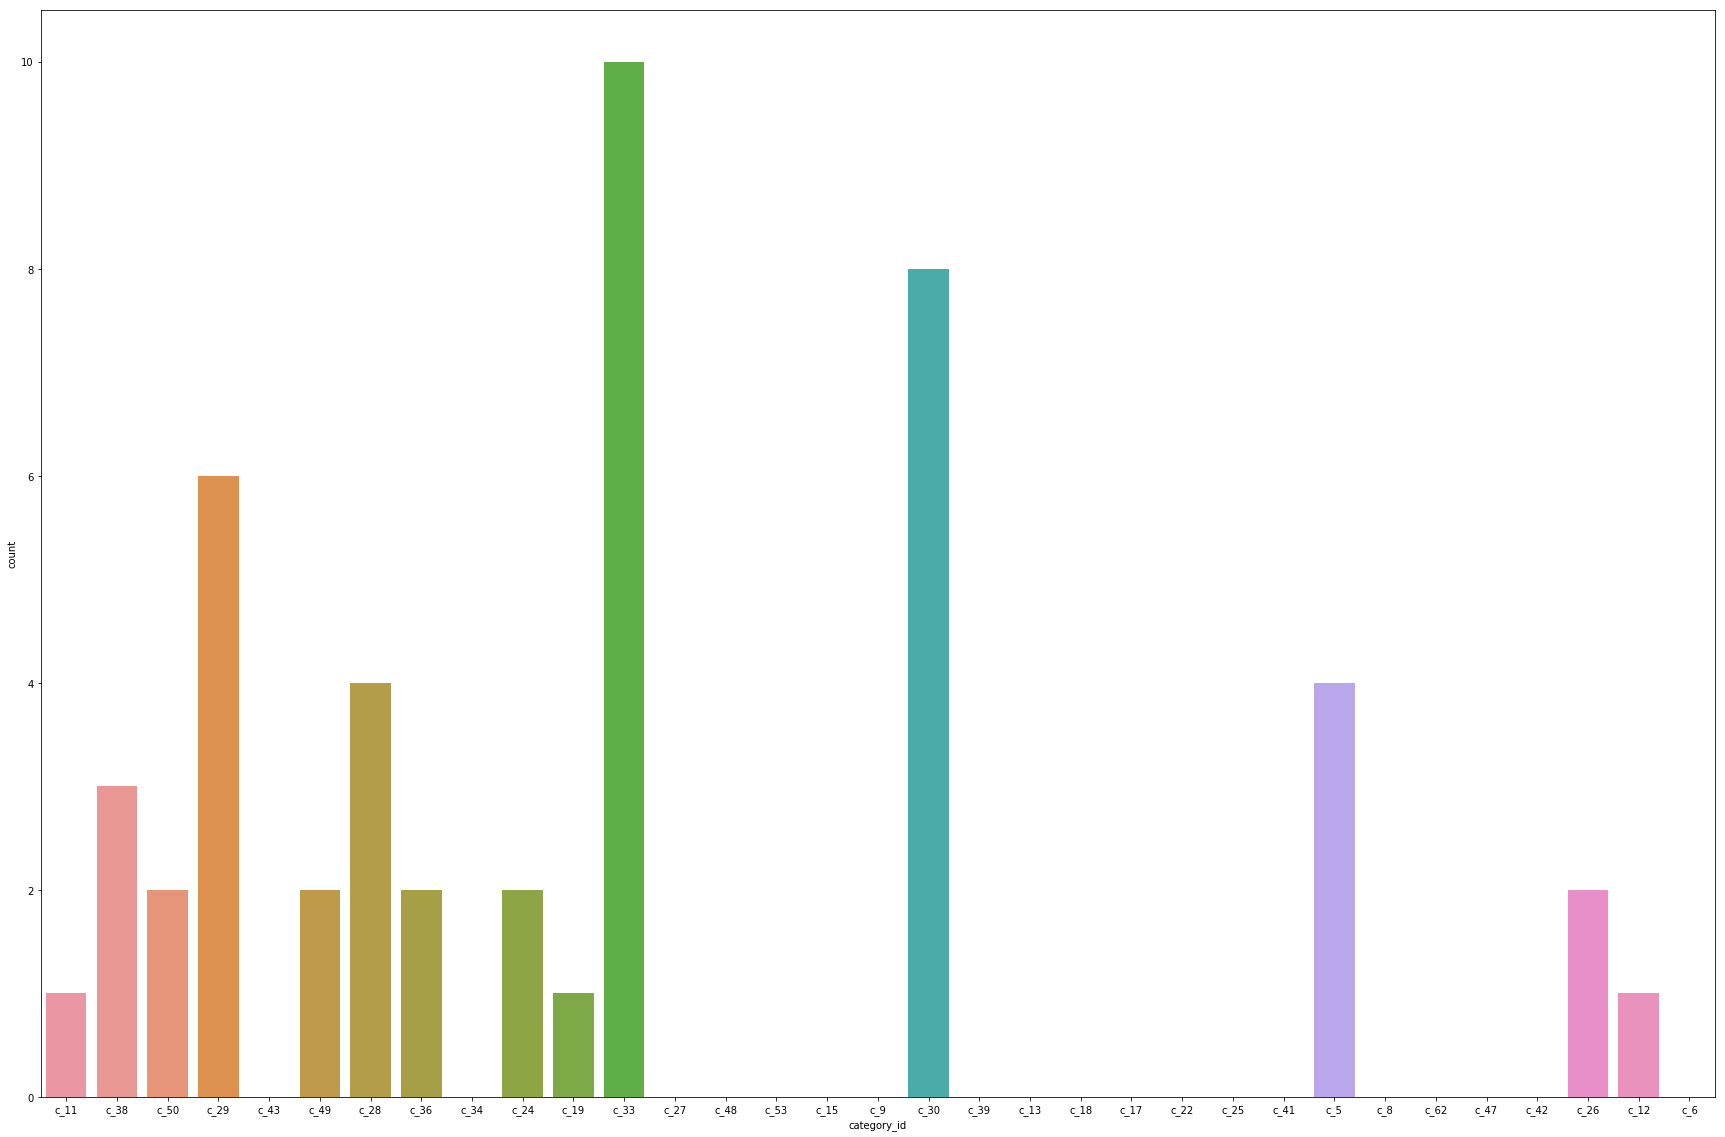

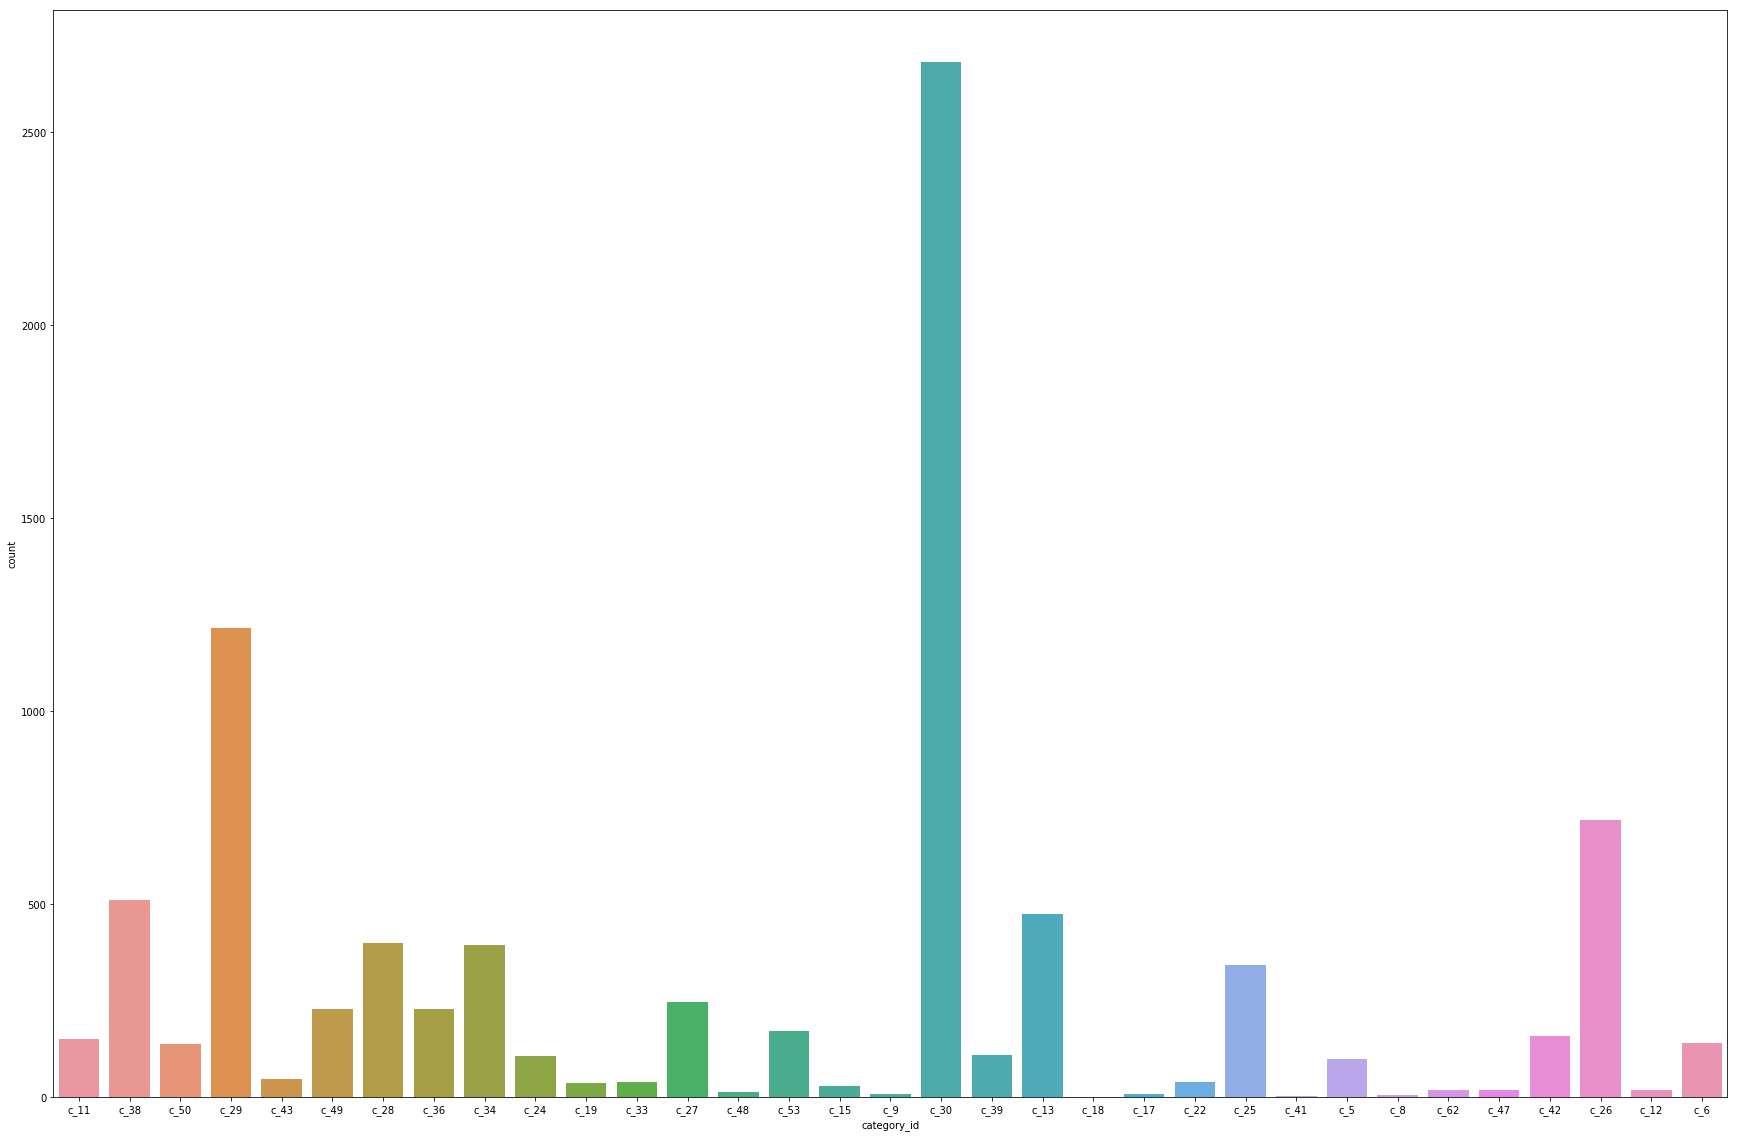

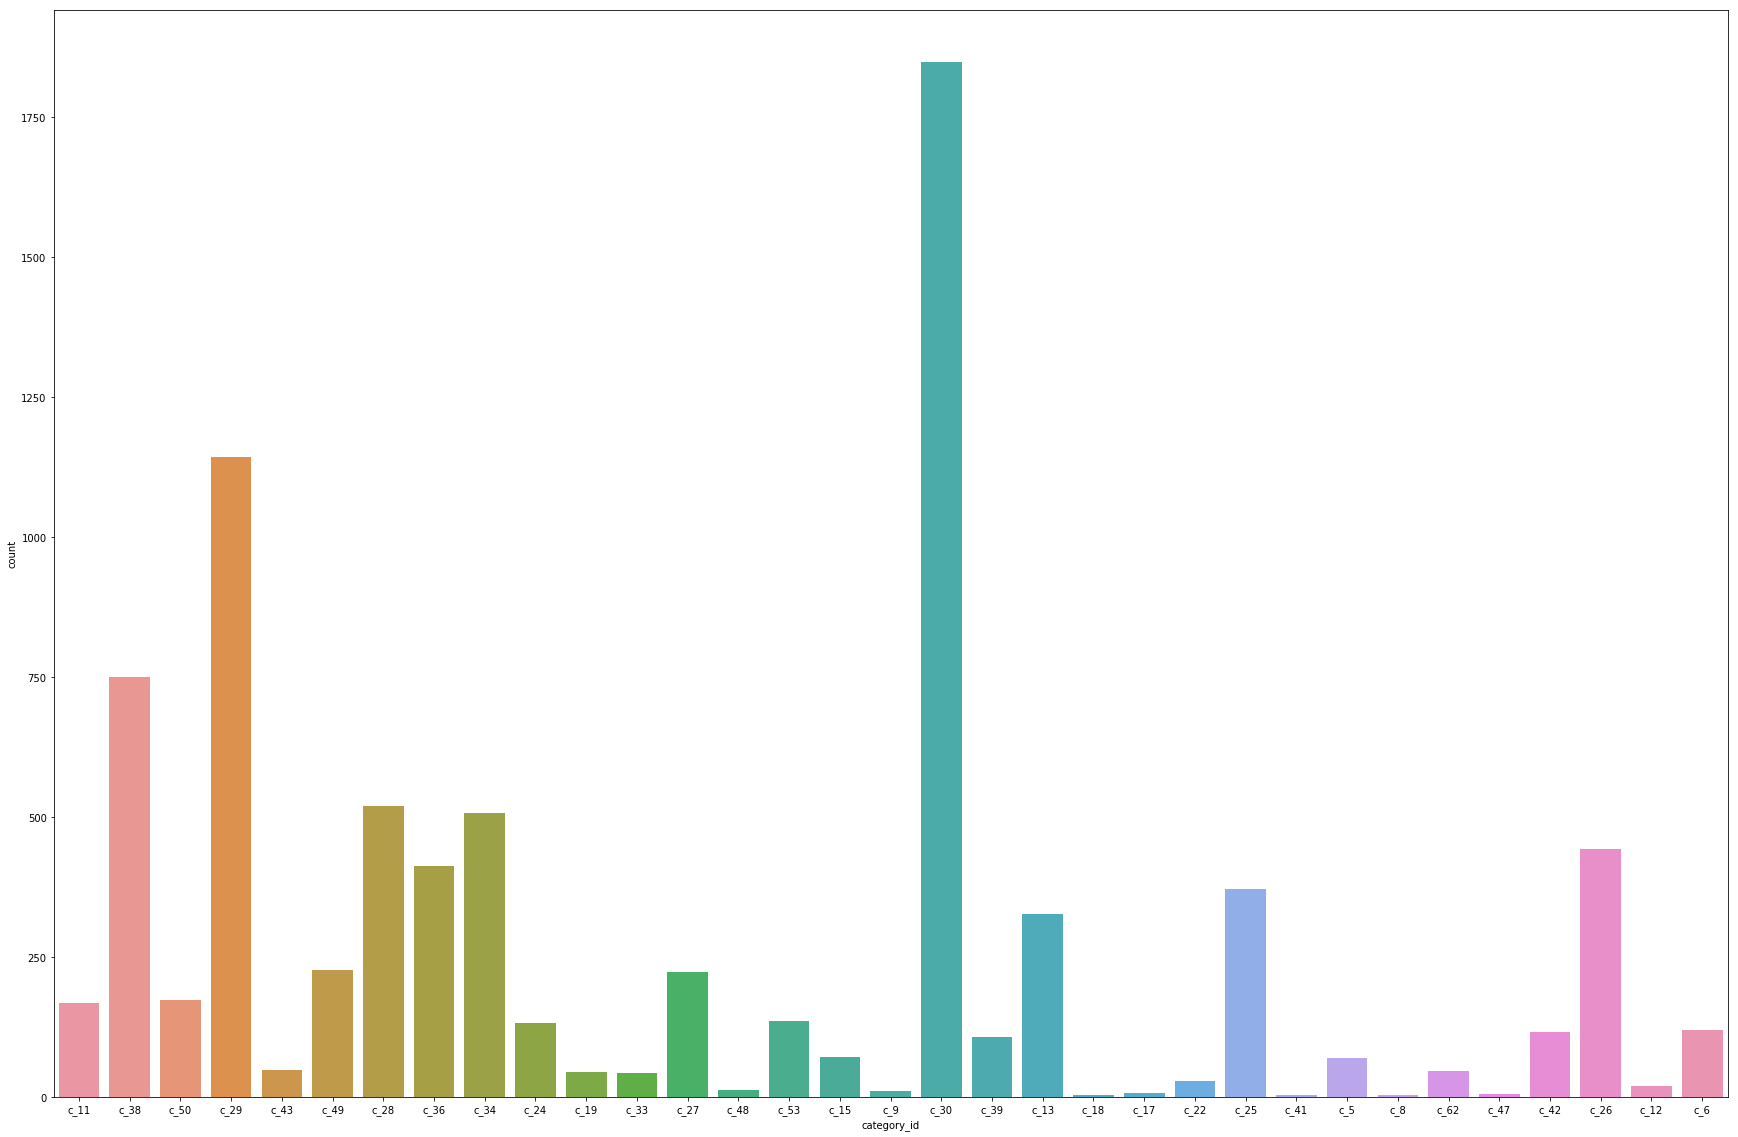

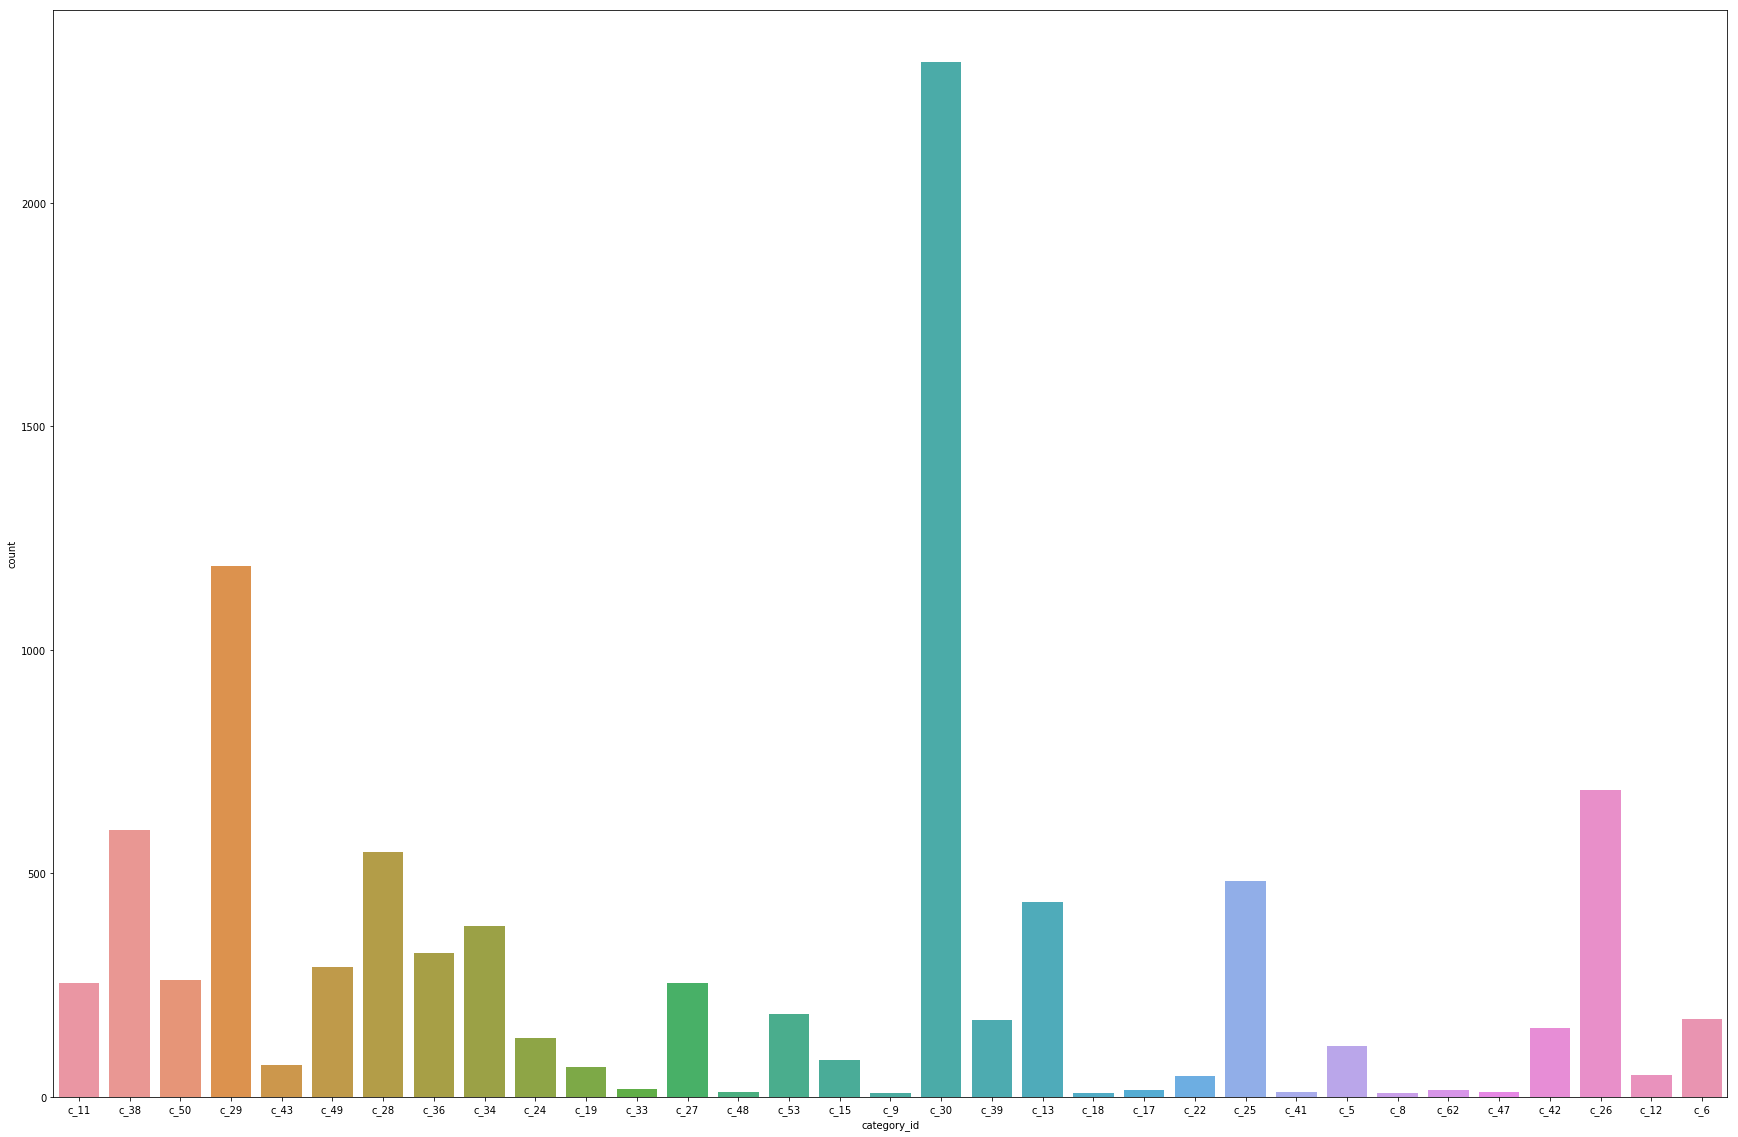

In [62]:
f,ax = plt.subplots(1,1,figsize=(30,20))
ses.countplot(x="category_id", data=little,order=shop.category_id.unique(),ax=ax)
plt.show()
f,ax = plt.subplots(1,1,figsize=(30,20))
ses.countplot(x="category_id", data=zhongwu,ax=ax,order=shop.category_id.unique())
plt.show()
f,ax = plt.subplots(1,1,figsize=(30,20))
ses.countplot(x="category_id", data=xiawu,ax=ax,order=shop.category_id.unique())
plt.show()
f,ax = plt.subplots(1,1,figsize=(30,20))
ses.countplot(x="category_id", data=wanshang,ax=ax,order=shop.category_id.unique())
plt.show()

In [32]:
print little.shape
print little.shop_id.unique().shape
print little.user_id.unique().shape

(48, 15)
(23,)
(36,)


In [34]:
little.groupby("user_id").count()["shop_id"].reset_index()

,user_id,shop_id
0,u_11191746,1
1,u_11877791,1
2,u_12201776,1
3,u_13094691,1
4,u_14666401,2
5,u_14925812,1
6,u_23595814,1
7,u_24096210,1
8,u_24276751,2
9,u_2475751,1


In [38]:
train[train.user_id=="u_14666401"]

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend
62240,u_14666401,s_293082,2017-08-26 22:30,116.863017,40.326975,b_40142834|-73|false;b_41033308|-81|false;b_38...,c_30,116.863439,40.327104,48,m_7168,2017-08-26 22:30:00,5,22,1
62241,u_14666401,s_293082,2017-08-26 22:30,116.943501,40.393826,b_38005323|-77|false;b_18104413|-70|false;b_41...,c_30,116.863439,40.327104,48,m_7168,2017-08-26 22:30:00,5,22,1
62242,u_14666401,s_293082,2017-08-26 12:00,116.863017,40.326975,b_62803|-79|false;b_32788960|-70|false;b_33310...,c_30,116.863439,40.327104,48,m_7168,2017-08-26 12:00:00,5,12,1
62243,u_14666401,s_293082,2017-08-26 12:00,116.943501,40.393826,b_32788960|-70|false;b_33310185|-69|false;b_41...,c_30,116.863439,40.327104,48,m_7168,2017-08-26 12:00:00,5,12,1


In [44]:
train[train.user_id=="u_641642"]

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend
459177,u_641642,s_381583,2017-08-27 22:30,116.863273,40.325892,b_26350282|-73|false;b_48202137|-85|false;b_38...,c_50,116.862992,40.32598,55,m_7168,2017-08-27 22:30:00,6,22,1
459178,u_641642,s_381583,2017-08-27 22:30,116.874976,40.308710,b_13844738|-49|false;b_54368891|-88|false;b_13...,c_50,116.862992,40.32598,55,m_7168,2017-08-27 22:30:00,6,22,1


In [42]:
train[train.user_id=="u_641642"].wifi_infos.iloc[0]

'b_26350282|-73|false;b_48202137|-85|false;b_38099830|-85|false;b_13844738|-49|false;b_13844739|-62|true;b_54368891|-88|false'

In [43]:
train[train.user_id=="u_641642"].wifi_infos.iloc[1]

'b_13844738|-49|false;b_54368891|-88|false;b_13844739|-62|true;b_38099830|-85|false;b_26350282|-73|false;b_48202137|-85|false'

In [48]:
g = train.groupby(["user_id","dt"]).count()["shop_id"].reset_index()

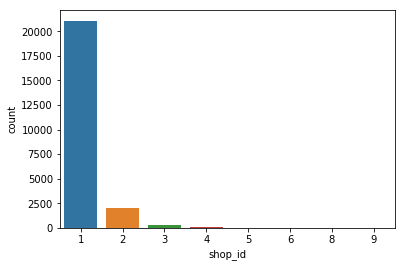

In [52]:
#大多数用户在同一时间只交易一次，部分用户会交易多次
ses.countplot(x="shop_id",data=g)
plt.show()

In [55]:
g[g.shop_id>=2].describe()

,shop_id
count,2401.000000
mean,2.200333
std,0.532541
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,9.000000


In [54]:
train[train.user_id=="u_1012548"].sort_values(by="dt")

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend
234055,u_1012548,s_4386,2017-08-26 16:40,116.862771,40.326287,b_47498483|-88|false;b_34767971|-72|false;b_11...,c_29,116.862505,40.325858,52,m_7168,2017-08-26 16:40:00,5,16,1
234058,u_1012548,s_4386,2017-08-26 16:40,116.862486,40.327467,b_25539529|-74|false;b_47526483|-87|false;b_37...,c_29,116.862505,40.325858,52,m_7168,2017-08-26 16:40:00,5,16,1
234054,u_1012548,s_4386,2017-08-26 18:00,116.862771,40.326287,b_19496611|-86|false;b_32126069|-88|false;b_62...,c_29,116.862505,40.325858,52,m_7168,2017-08-26 18:00:00,5,18,1
234057,u_1012548,s_383953,2017-08-26 18:00,116.863273,40.325901,b_62556|-73|false;b_19496611|-82|false;b_31568...,c_17,116.862436,40.327368,64,m_7168,2017-08-26 18:00:00,5,18,1
234059,u_1012548,s_4386,2017-08-26 18:00,116.862486,40.327467,b_62443|-81|false;b_62638|-81|false;b_49747231...,c_29,116.862505,40.325858,52,m_7168,2017-08-26 18:00:00,5,18,1
234061,u_1012548,s_383953,2017-08-26 18:00,116.862232,40.327525,b_62556|-73|false;b_32126069|-88|false;b_15405...,c_17,116.862436,40.327368,64,m_7168,2017-08-26 18:00:00,5,18,1
234056,u_1012548,s_383953,2017-08-26 18:20,116.863273,40.325901,b_50135722|-68|false;b_39388748|-76|false;b_20...,c_17,116.862436,40.327368,64,m_7168,2017-08-26 18:20:00,5,18,1
234060,u_1012548,s_383953,2017-08-26 18:20,116.862232,40.327525,b_20579288|-70|false;b_8211594|-79|false;b_263...,c_17,116.862436,40.327368,64,m_7168,2017-08-26 18:20:00,5,18,1


In [65]:
train["dayofyear"] = train.dt.dt.dayofyear

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
g2 = train.groupby(["user_id","dayofyear"]).count()["shop_id"].reset_index()

In [72]:
g2morethan2 = g2[g2.shop_id >= 2]

In [85]:
train[train.user_id==g2morethan2.user_id.iloc[7]]

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,dt,weekday,hour,is_weekend,dayofyear
726455,u_10183067,s_295308,2017-08-24 17:10,116.863016,40.326973,b_33310185|-75|false;b_20417640|-71|false;b_62...,c_39,116.863515,40.327064,47,m_7168,2017-08-24 17:10:00,3,17,0,236
726456,u_10183067,s_295706,2017-08-24 17:00,116.863034,40.327030,b_32126069|-73|false;b_22112416|-59|false;b_40...,c_13,116.863428,40.327109,50,m_7168,2017-08-24 17:00:00,3,17,0,236
